# Modül 2 :: Python ML Ekosistemi (NumPy, Pandas, Matplotlib)

<a target="_blank" href="https://colab.research.google.com/github/Frightera/ML-Kursu-Youtube/blob/main/Notebooklar/ML_Modul02_Python_ML_Ekosistemi.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/> </a>

## 0) Ortam ve Bağımlılıklar

In [ ]:
import io
import platform
import random
import sys
import time
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown, display

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)
plt.rcParams["figure.figsize"] = (6, 4)

print("Python   :", sys.version.split()[0])
print("Platform :", platform.platform())
print("NumPy    :", np.__version__)
print("Pandas   :", pd.__version__)

Python   : 3.11.13
Platform : Linux-6.1.123+-x86_64-with-glibc2.35
NumPy    : 2.0.2
Pandas   : 2.2.2


---
## 1) NumPy >> Temeller ve Performans
Python, genel amaçlı, esnek ve okunması kolay bir dildir. Ancak büyük veri setleri üzerinde karmaşık matematiksel işlemler yapmak söz konusu olduğunda, standart Python listeleri ve `for` döngüleri ciddi bir performans kaybı oluşturur.

İşte bu noktada **NumPy (Numerical Python)** devreye girer. Python'a yüksek performanslı, çok boyutlu dizi nesneleri ve bu diziler üzerinde çalışmak için tasarlanmış araçlar ekleyen temel bir kütüphanedir.

### 1.1. ndarray, dtype, shape, axis

1.  **`ndarray` (N-dimensional array):**
    NumPy'nin temel veri yapısıdır. `a` bir 2-boyutlu dizi (matris), `b` ise 1-boyutlu bir dizidir (vektör).

2.  **`dtype` (Data Type - Veri Tipi):**
    Dizinin içindeki tüm elemanların veri tipini belirtir. `a` tamsayılardan (`int64`), `b` ise ondalıklı sayılardan (`float64`) oluşur. Veri tipleri aynı olmak zorunda değildir fakat aynı olduğunda performans daha iyi olacaktır.

3.  **`shape` (Şekil):**
    Dizinin her bir boyuttaki eleman sayısını gösteren bir tuple'dır.
    *   `a.shape: (3, 4)` → `a`'nın 3 satırı ve 4 sütunu var.
    *   `b.shape: (4,)` → `b`'nin 1 boyutu ve içinde 4 elemanı var.



In [ ]:
a = np.arange(12).reshape(3, 4)
b = np.linspace(0, 1, 4)
display(Markdown("**a (3x4):**"))
print(a)
display(Markdown("**b (4,):**"))
print(b)
print("a.dtype:", a.dtype, "| a.shape:", a.shape)
print("b.dtype:", b.dtype, "| b.shape:", b.shape)
print("a.sum(axis=0):", a.sum(axis=0))
print("a.mean(axis=1):", a.mean(axis=1))

**a (3x4):**

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


**b (4,):**

[0.         0.33333333 0.66666667 1.        ]
a.dtype: int64 | a.shape: (3, 4)
b.dtype: float64 | b.shape: (4,)
a.sum(axis=0): [12 15 18 21]
a.mean(axis=1): [1.5 5.5 9.5]


4.  **`axis` (Eksen):**
    Bir işlemin hangi boyut **boyunca** yapılacağını belirten en önemli parametredir. Bir eksen boyunca işlem yapmak, o ekseni "özetlemek" anlamına gelir.
    ```text
    <---------------- axis = 1 ---------------->
       Sütunlar boyunca yapılan işlem (sağa doğru)
       shape: (3, 4)
      ^     [[ 0  1  2  3]   ---> a.mean(axis=1) ---> [ 1.5]
      |      [ 4  5  6  7]   ---> a.mean(axis=1) ---> [ 5.5]
axis = 0 [ 8  9 10 11]]  ---> a.mean(axis=1) ---> [ 9.5]
      |        ↓  ↓  ↓  ↓
      ↓        |  |  |  |
               +--+--+--+
                   |
                   V
     a.sum(axis=0) ---> [12 15 18 21]

    Satırlar boyunca yapılan işlem (aşağı doğru)
    ```
    *   **`a.sum(axis=0)`: Satırlar Boyunca Toplama**
        *   Okların yönü **aşağı doğrudur**. Bu, `axis=0`'ın her sütundaki elemanları yukarıdan aşağıya doğru işlediği anlamına gelir.
        *   `0 + 4 + 8 = 12`
        *   `1 + 5 + 9 = 15`
        *   ...ve böyle devam eder.
        *   `shape`(3, 4) olan bir dizide `axis=0` boyunca işlem yapınca, 3 satır "perçinlenir" ve sonuç `shape`(4,) olan bir dizi olur.

    *   **`a.mean(axis=1)`: Sütunlar Boyunca Ortalama Alma**
        *   Okların yönü **sağa doğrudur**. Bu, `axis=1`'in her satırdaki elemanları soldan sağa doğru işlediği anlamına gelir.
        *   `(0 + 1 + 2 + 3) / 4 = 1.5`
        *   `(4 + 5 + 6 + 7) / 4 = 5.5`
        *   ...ve böyle devam eder.
        *   `shape`(3, 4) olan bir dizide `axis=1` boyunca işlem yapınca, 4 sütun "perçinlenir" ve sonuç `shape`(3,) olan bir dizi olur.

### 1.2. Broadcasting kuralları

Farklı boyutlardaki NumPy dizileri arasında aritmetik işlemler yapmaya çalıştığımızda, NumPy'nin elemanları nasıl hizalayacağını ve işlemi nasıl gerçekleştireceğini belirleyen kurallar setine **broadcasting** denir.

Bu mekanizma, bellekte fazladan kopyalar oluşturmadan ve Python'da yavaş `for` döngüleri yazmadan, vektörize işlemleri çok esnek bir şekilde yapmamızı sağlar.

---

#### Bir Matris ile Vektörü Toplamak

Aşağıdaki kod, `(3, 4)` şeklinde bir matris (`a`) ile `(4,)` şeklinde bir vektörü (`b`) topluyor. Normalde, matris cebirinde bu işlem tanımsızdır. Ancak NumPy broadcasting sayesinde bunu mümkün kılar.

In [ ]:
# (3x4) + (4,) -> (3x4)
c = a + b
print("c.shape:", c.shape)
print(c)

c.shape: (3, 4)
[[ 0.          1.33333333  2.66666667  4.        ]
 [ 4.          5.33333333  6.66666667  8.        ]
 [ 8.          9.33333333 10.66666667 12.        ]]


Gördüğümüz gibi, işlem başarıyla gerçekleşti ve sonuç olarak `a` ile aynı şekilde, `(3, 4)` boyutunda bir matris elde ettik. Peki bu nasıl oldu?

#### Broadcasting - Sihirli Mi

NumPy iki diziyi işleme sokmadan önce, boyutlarını (shape) **sağdan sola doğru** karşılaştırır. İki boyutun uyumlu sayılması için iki koşuldan biri sağlanmalıdır:

1.  Boyutlar birbirine eşittir.
2.  Boyutlardan biri `1`'dir.

Eğer dizilerden birinin boyut sayısı diğerinden azsa NumPy onun shape'inin soluna `1`'ler ekleyerek boyut sayılarını eşitler. **Dikkat edin shape'den bahsediyoruz, array'in kendisinin içine `1` yerleştirmiyoruz.**

#### Bizim Örneğimize Tekrardan BAkalım

1.  **Şekilleri yazalım:**
    *   `a.shape` -> `(3, 4)`
    *   `b.shape` -> `(  , 4)` (Okunurluk için boşluk bıraktık)

2.  **Sağdan sola karşılaştıralım:**
    *   **Sağdan 1. Boyut:** `a`'nın boyutu `4`, `b`'nin boyutu `4`. Bunlar **eşit**. Uyumlu.
    *   **Sağdan 2. Boyut:** `a`'nın boyutu `3`, ancak `b`'nin bu boyutu yok.

3.  **Kuralı Uygula:** NumPy, `b`'nin eksik olan sol boyutlarını `1` olarak varsayar ve bu `1` boyutunu diğer dizinin boyutuna uyacak şekilde "gerer" veya "yayınlar" (broadcast eder). Yani, `b`'yi geçici olarak `(1, 4)` şeklinde bir matris gibi düşünür. Bu `1`'lik boyut, `a`'nın `3`'lük boyutuna uyacak şekilde gerilir.

#### Görsel Anlatım:

Bu süreci zihnimizde şu şekilde canlandırabiliriz:

1.  **Orijinal Diziler:**
    ```
    a (3, 4)              b (4,)
    [[ 0  1  2  3]         [0.0  0.33  0.66  1.0]
     [ 4  5  6  7]
     [ 8  9 10 11]]
    ```

2.  **`b`'nin "Kopyalanması":**
    NumPy, `b` vektörünü `a` matrisinin her bir satırına uygulanacak şekilde sanal olarak kopyalar:
    ```
    Kopyalanmış b (3, 4)
    [[0.0  0.33  0.66  1.0]
     [0.0  0.33  0.66  1.0]
     [0.0  0.33  0.66  1.0]]
    ```

3.  **Element-Bazlı Toplama:**
    Artık iki matrisin de şekli `(3, 4)` olduğu için, eleman bazlı toplama işlemi basitçe yapılabilir:
    ```
    [[ 0  1  2  3]      [[0.0  0.33  0.66  1.0]      [[ 0.    1.33  2.66  4.  ]
     [ 4  5  6  7]   +   [0.0  0.33  0.66  1.0]   =   [ 4.    5.33  6.66  8.  ]
     [ 8  9 10 11]]      [0.0  0.33  0.66  1.0]]      [ 8.    9.33 10.66 12.  ]]
    ```

**Önemli Not:** NumPy bellekte `b`'nin kopyalarını gerçekten oluşturmaz. Bu çok ilkel bir yöntem olurdu :) Bu "kopyalama" işlemi, C seviyesinde çok daha verimli bir şekilde yönetilir.

### 1.3. Vektörizasyon vs döngü
Teoride NumPy'nin vektörize işlemlerinin, Python'un `for` döngülerinden daha hızlı olduğunu biliyoruz. Bu bölümde 150K elemanlı bir dizinin her bir elemanının karesini alma gibi basit bir işlemi iki yöntemle de gerçekleştirip, aradaki zaman farkını somut olarak ölçeceğiz.

Daha ileri seviye ölçümler yapmak isterseniz [perfplot](https://github.com/nschloe/perfplot) kütüphanesine bakabilirsiniz.

In [ ]:
n = 150_000
x = np.random.randn(n)

t0 = time.time()
y_loop = [xi * xi for xi in x]
t_loop = time.time() - t0
t0 = time.time()
y_vec = x * x
t_vec = time.time() - t0

import pandas as pd

comp = pd.DataFrame(
    [["Python döngüsü", round(t_loop, 6)], ["NumPy vektörize", round(t_vec, 6)]],
    columns=["Yöntem", "Süre (sn)"],
)
display(comp.style.hide(axis="index"))

Yöntem,Süre (sn)
Python döngüsü,0.013776
NumPy vektörize,0.000738


#### Bu Fark Nereden Kaynaklanıyor?

* Python Döngüsü `([xi*xi for xi in x])`:
    * Bu işlem Python seviyesinde gerçekleşir.
    * Python interpreteri 150K defa döngüye girmelidir.
    * Her bir döngü adımında:
        * Diziden `x_{i}` elemanını al.
        * Çarpma işlemini yap.
        * Sonucu yeni listeye ekle.
    * Bu adımların her biri, Python'ın kendi iç mekanizmaları nedeniyle bir ek maliyet (overhead) yaratır. 150K işlem için bu maliyet birikir.

* NumPy Vektörizasyonu `(x*x)`:
    * Bu işlem arka planda, optimize edilmiş, derlenmiş C kodunda gerçekleşir.
    * Python, NumPy'ye sadece tek bir komut gönderir: "Bu x dizisini kendisiyle çarp."
    * Python yorumlayıcısının yarattığı ek maliyet, 150,000 eleman için değil, sadece bir kez tüm operasyon için ödenir.
    * C seviyesindeki döngü, bellek yönetimi ve işlemci komutları (SIMD gibi) açısından son derece verimlidir.
    
    
* **Yani Sonuç:** Veri üzerinde matematiksel bir işlem yaparken, bir elemanı alıp onunla bir şey yapmayı ve sonra bir sonrakine geçmeyi düşünmek yerine, `tüm dizi üzerinde bu operasyonu uygula` şeklinde düşünmek, yani vektörize düşünmek, hem daha temiz kod yazmamızı sağlar hem de performansta fark oluşturur


### 1.4. İndisleme - slice, boolean, fancy

NumPy dizilerinden veri alt kümeleri seçmek için kullanılan çeşitli güçlü yöntemler vardır. Bu yöntemler, `for` döngülerine ihtiyaç duymadan, verimli ve okunaklı bir şekilde veri seçmemizi sağlar. Bu bölümde üç ana indisleme tekniğini inceleyeceğiz.

---

#### `X` Matrisi

Tüm örneklerimizi aşağıdaki `4x5`'lik `X` matrisi üzerinde yapacağız.

    X:
    [[ 0  1  2  3  4]
     [ 5  6  7  8  9]
     [10 11 12 13 14]
     [15 16 17 18 19]]

---

#### 1. Slice Indexing (Dilimleme): Alt Matrisler Oluşturma

Python listelerinden aşina olduğumuz `start:stop:step` sözdiziminin çok boyutlu halidir. Bir diziden "dikdörtgen" bir bölge seçmek için kullanılır.

**Kod ve Çıktı:**

    Slice [1:3, 2:]:
    [[ 7  8  9]
     [12 13 14]]

**Nasıl Çalışır?**

`X[1:3, 2:]` ifadesi iki bölümden oluşur: `[satır_dilimi, sütun_dilimi]`.
*   **`1:3` (Satırlar):** 1. indeksteki satırdan başla, 3. indeksteki satıra **kadar** (ama dahil değil) git. Yani, **1. ve 2. satırları** seçer.
*   **`2:` (Sütunlar):** 2. indeksteki sütundan başla ve **sonuna kadar** git. Yani, **2., 3. ve 4. sütunları** seçer.

Bu iki seçimin kesişim kümesi, sonuçtaki alt matrisi oluşturur.

                 c2 c3 c4
                  ↓  ↓  ↓
    r1-> [[ . . | 7  8  9 |]
    r2->  [ . . |12 13 14 |]]

---

#### 2. Boolean Indexing (Maskeleme): Koşula Uyan Verileri Seçme

Bir dizi üzerinde mantıksal bir koşul çalıştırarak, sadece koşulu sağlayan (`True` olan) elemanları seçmektir.

**Kod ve Çıktı:**

    Boolean mask (çiftler):
    [ 0  2  4  6  8 10 12 14 16 18]

**Nasıl Çalışır?**

Bu işlem iki adımdan oluşur:
1.  **Maske Oluşturma:** `mask = X % 2 == 0` komutu, `X` ile aynı şekilde, ama içi `True`/`False` değerleriyle dolu bir "maske" dizisi oluşturur.
2.  **Maskeyi Uygulama:** `X[mask]` yazdığımızda, NumPy `X` dizisindeki sadece `mask`'ın `True` olduğu konumlardaki elemanları seçer.

**Önemli Not:** Boolean indisleme sonucunda dönen dizi, orijinal dizinin şeklinden bağımsız olarak **her zaman 1 boyutlu (düzleştirilmiş) bir dizidir.**

---

#### 3. Fancy Indexing: Belirli Koordinatları Seçme

Bir veya daha fazla indis dizisi kullanarak, matrisin herhangi bir yerindeki belirli elemanları tek tek seçmektir.

**Kod ve Çıktı:**
    
    
    rows = np.array([0,2])
    cols = np.array([1,3])
    Fancy: [ 1 13]
    
**Nasıl Çalışır?**

`X[rows, cols]` komutu, `rows` ve `cols` dizilerindeki elemanları birer birer eşleştirerek koordinatlar oluşturur.
*   `rows = np.array([0,2])`
*   `cols = np.array([1,3])`

NumPy şu koordinatları oluşturur ve karşılık gelen elemanları seçer:
1.  İlk koordinat: `(rows, cols)` → `(0, 1)` → `X`'in değeri **1**'dir.
2.  İkinci koordinat: `(rows, cols)` → `(2, 3)` → `X`'ün değeri **13**'tür.

Neticede buu seçilen elemanlardan oluşan yeni bir dizidir.

---

#### Özet Karşılaştırma

| Yöntem | Syntax | Ne Yapar? | Sonucun Şekli |
|:---|:---|:---|:---|
| **Slice** | `X[1:3, 2:]` | Diziden dikdörtgen bir alt bölge seçer. | Orijinal boyutluluğu korur. `(2, 3)` |
| **Boolean** | `X[X > 10]` | Bir koşulu sağlayan tüm elemanları seçer. | Her zaman 1D'dir. |
| **Fancy** | `X[[0, 2], [1, 3]]` | Belirli koordinatlardaki elemanları seçer. | İndis dizilerinin şekline bağlıdır. |

In [ ]:
X = np.arange(20).reshape(4, 5)
display(Markdown("**X:**"))
print(X)
display(Markdown("**Slice [1:3, 2:]:**"))
print(X[1:3, 2:])
mask = X % 2 == 0
display(Markdown("**Boolean mask (çiftler):**"))
print(X[mask])
rows = np.array([0, 2])
cols = np.array([1, 3])
print("Fancy:", X[rows, cols])

**X:**

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


**Slice [1:3, 2:]:**

[[ 7  8  9]
 [12 13 14]]


**Boolean mask (çiftler):**

[ 0  2  4  6  8 10 12 14 16 18]
Fancy: [ 1 13]


### 1.5. Şekil dönüşümü, görünüm/kopya

NumPy büyük veri setleriyle verimli bir şekilde çalışmak üzere tasarlanmıştır. Bu verimliliğin temel yollarından biri, **gereksiz veri kopyalamaktan kaçınmaktır.**

Bir dizi üzerinde yaptığınız birçok işlem (şekil değiştirme, dilimleme vb.) aslında yeni bir veri bloğu oluşturmak yerine, mevcut veri bloğuna farklı bir "pencereden bakmanızı" sağlayan bir **görünüm (view)** döndürür.

In [ ]:
Y = X.reshape(2, 10)
Z = X.ravel()  # tek eksene düzleştir (view?)
Z[0] = -999  # view
print("X[0,0] →", X[0, 0])

X[0,0] → -999


#### Neden X Değişti?

Bu çıktının nedeni, `X.ravel()` (ve çoğu durumda X.reshape()) işleminin yeni bir kopya oluşturmak yerine, orijinal X'in verisine bakan bir view - görünüm döndürmesidir.

* `Z = X.ravel()`: Bu satırda, Z adında yeni bir dizi oluşturulur. Ancak Z, X'in verilerini kopyalamaz. Bunun yerine Z, X'in bellekteki aynı veri bloğuna işaret eden yeni bir ndarray nesnesidir. Tek farkı, bu veriyi `(20,)` şeklinde yorumlamasıdır, X ise `(4, 5)` şeklinde yorumlar.

* `Z[0] = -999`: Bu satırda, Z görünümü üzerinden bellekteki ilk elemanın değerini `-999` olarak değiştiriyoruz.

* **Sonuç**: `X` ve `Z` aynı bellek alanını paylaştığı için, birinde yapılan değişiklik doğrudan diğerine yansır. `Z[0]`'ı değiştirmek, aslında `X[0,0]`'ın bulunduğu bellek hücresini değiştirmekle tamamen aynı şeydir.

#### Görünüm vs. Kopya: Temel Fark

* Görünüm (View): Orijinal veriye açılmış farklı bir pencere veya bir "lakap" (alias) gibidir. Pencereden dışarı bakıp duvara bir resim çizerseniz, orijinal duvarın kendisi boyanmış olur. ravel, reshape, ve çoğu slice işlemi bir görünüm döndürür.

* Kopya (Copy): Orijinal verinin tamamen bağımsız bir kopyasıdır. Dışarıdaki duvarın fotoğrafını çekip, o fotoğrafın üzerine bir şeyler çizmek gibidir. Orijinal duvar bundan etkilenmez.

#### Ne Zaman Kopya Oluşturulur?
* Boolean veya fancy indisleme gibi işlemler genellikle bir kopya döndürür çünkü seçilen elemanlar bellekte bitişik bir blok oluşturmaz.

* Eğer bir işlem sonucunda orijinal dizinin etkilenmediğinden emin olmak istiyorsanız, açıkça `.copy()` metodunu kullanmalısınız.


#### Özetlersek..

| İşlem | Davranış | Yan Etki | Performans |
|:---|:---|:---|:---|
| **Görünüm (View)** | Aynı veriye farklı bir şekil/bakış açısı sağlar. | Birini değiştirmek diğerini de değiştirir. | Çok hızlı, bellek dostu. |
| **Kopya (Copy)** | Verinin yeni ve bağımsız bir kopyasını oluşturur. | Birini değiştirmek diğerini etkilemez. | Daha yavaş, bellek kullanımı artar. |

**Kural:** NumPy'de bir dizi üzerinde değişiklik yaparken, bu değişikliğin başka bir diziyi etkileyip etkilemeyeceğinden emin değilseniz, ya `.copy()` kullanarak kendinizi garantiye alın ya da verilerin aynı belleği paylaşıp paylaşmadığını `np.shares_memory(X, Z)` komutu ile kontrol edebilirsniz.


### 1.6. RNG ve doğrusal cebir

NumPy sadece veri saklama ve temel aritmetik işlemler için değil, aynı zamanda makine öğrenmesi ve istatistik için hayati önem taşıyan daha gelişmiş görevleri yerine getirmek için de güçlü alt modüllere sahiptir. Bu bölümde `np.random` ve `np.linalg` modüllerine hızlı bir giriş yapacağız.

---

#### Rastgele Sayı Üretmekk

Makine öğrenmesinde:
* Simülasyonlar oluşturmak,
* Model ağırlıklarını başlatmak veya
* Veriyi rastgele karıştırmak gibi

birçok görev için tekrarlanabilir rastgele sayılara ihtiyaç duyarız.

**Kod ve Çıktı:**
> `rng.normal(0, 1, 5)`: [ 0.30471708 -1.03998411 0.7504512 0.94056472 -1.95103519]

**Açıklama:**
*   **`rng = np.random.default_rng(RANDOM_STATE)`**: Bu satır, modern ve tavsiye edilen yöntemle bir "Rastgele Sayı Üreteci" (Random Number Generator) nesnesi oluşturur.
    *   `default_rng()`: NumPy'ın istatistiksel olarak daha sağlam olan yeni nesil üretecini çağırır.
    *   `RANDOM_STATE`: Bu seed değeri, rastgele sayı üretim sürecini başlatır. Aynı tohum değeri kullanıldığı sürece, üretilen "rastgele" sayılar dizisi her zaman **aynı olacaktır**. Bu, deneylerin **tekrarlanabilirliği** için kritik öneme sahiptir.
*   **`rng.normal(0, 1, 5)`**: Oluşturulan `rng` nesnesini kullanarak, standart normal dağılımdan örnekler çeker.
    *   **1. Argüman (`0`):** Dağılımın ortalaması (μ).
    *   **2. Argüman (`1`):** Dağılımın standart sapması (σ).
    *   **3. Argüman (`5`):** Üretilecek örnek sayısı.

---

### Lineer Cebir - `np.linalg` Modülü

Doğrusal cebir, makine öğrenmesinin matematiksel temelidir. `np.linalg` modülü, matris ayrıştırma, determinant hesaplama ve en temel olarak lineer denklem sistemlerini çözme gibi işlemler için optimize edilmiş fonksiyonlar içerir.

**Kod ve Çıktı:**
```python
A = np.array([[3.,2.],[2.,6.]])
b = np.array([2., -8.])
np.linalg.solve(A,b)
>> [ 2. -2.]
```

**Açıklama:**
Burada `Ax = b` formundaki bir lineer denklem sistemini çözüyoruz.
*   **`A` Matrisi:** Denklem sistemindeki katsayıları temsil eder.
*   **`b` Vektörü:** Denklemlerin sonuçlarını temsil eder.

Aslında denklem sistemini şu şekilde yazabiliriz:

    3x + 2y = 2
    2x + 6y = -8

*   **`np.linalg.solve(A, b)`**: Bu fonksiyon, `x` ve `y`'den oluşan bilinmeyenler vektörünü (`[x, y]`) bulur. Çıktı olan `[ 2. -2.]`, bu sistemin çözümünün **`x = 2`** ve **`y = -2`** olduğunu gösterir.

*   **Sağlamasını Yapalım:**
    *   `3*(2) + 2*(-2) = 6 - 4 = 2` (Birinci denklem sağlandı ✅)
    *   `2*(2) + 6*(-2) = 4 - 12 = -8` (İkinci denklem sağlandı ✅)

---

###3 Özet

| Modül | Amacı | Kullanım Alanı |
|:---|:---|:---|
| **`np.random`** | İstatistiksel dağılımlara dayalı, tekrarlanabilir rastgele veriler üretmek. | Simülasyon, veri artırma (augmentation), model başlatma, örneklem seçimi. |
| **`np.linalg`** | Doğrusal cebir operasyonlarını verimli bir şekilde gerçekleştirmek. | Lineer regresyonun temelini çözme, boyut azaltma (PCA), optimizasyon. |

In [ ]:
rng = np.random.default_rng(RANDOM_STATE)
print("Normal örnek:", rng.normal(0, 1, 5))
A = np.array([[3.0, 2.0], [2.0, 6.0]])
b = np.array([2.0, -8.0])
print("LA çözüm:", np.linalg.solve(A, b))

Normal örnek: [ 0.30471708 -1.03998411  0.7504512   0.94056472 -1.95103519]
LA çözüm: [ 2. -2.]


---
## 2) Pandas - Tablosal Veri ile Üretkenlik
Eğer ki NumPy Python'un bilimsel hesaplama için temel motoruysa, **Pandas** da bu motorun üzerine kurulmuş, veriyi temizlemek, dönüştürmek, analiz etmek ve görselleştirmek için kullanılan yüksek performanslı bir "şasi" ve "kokpit"tir. Kısacası, Python için **"Excel'in veya SQL'in süper güçlere sahip hali"** olarak düşünebiliriz.

---

### 2.0 Giriş ve Temel Bilgiler
#### Temel Veri Yapıları: `Series` ve `DataFrame`

Pandas'ın evreni iki temel yapı üzerine kuruludur:

*   **`pd.Series`:** Tek boyutlu, etiketli bir dizidir. Bir Excel sayfasındaki **tek bir sütun** veya bir veritabanı tablosundaki tek bir alan gibi düşünülebilir. Her elemanın bir **indeksi** vardır.

*   **`pd.DataFrame`:** İki boyutlu, etiketli bir veri yapısıdır (data structure olarak nitelendirebiliriz). Hem satır hem de sütun indekslerine sahiptir. Bir Excel sayfasının **tamamı** veya bir SQL tablosu ile eşdeğer olarak düşünebilirsiniz. Aslında aynı indeksi paylaşan birden fazla `Series` nesnesinin bir araya gelmiş halidir.

---

### Temel Operasyonlar ve Kavramlar

#### `loc` ve `iloc`: Hassas Veri Seçimi
Bir DataFrame'den belirli satırları ve sütunları seçmek için kullanılan iki temel yöntemdir.
*   **`.loc` (Label-based):** Etiket (indeks ve sütun adı) bazlı seçim yapar.
    *   **Analoji:** Bir telefon rehberinden bir kişiyi **adıyla** bulmak. (`df.loc['Ahmet', 'Telefon']`)
*   **`.iloc` (Integer-location-based):** Tamsayı (pozisyon) bazlı seçim yapar.
    *   **Analoji:** Telefon rehberindeki **5. kişiyi**, adının ne olduğuna bakmaksızın bulmak. (`df.iloc[4, 1]`)

---

#### `groupby`: Gruplama ve Agregasyon
Veri analizinin temel taşıdır. Veri setini belirli kategorilere göre gruplara ayırmamızı, her grup üzerinde bir fonksiyon (toplama, ortalama, sayma vb.) uygulamamızı ve sonuçları birleştirmemizi sağlar.
*   **Analoji:** Bir SQL sorgusundaki `GROUP BY` ifadesiyle tamamen aynı mantıkta çalışır. Örneğin, "her bir şehirdeki mağazaların ortalama cirosunu hesaplamak."

---

#### `pivot_table`: Veriyi Yeniden Şekillendirme
Veriyi "uzun" formattan "geniş" formata çevirerek özet tablolar oluşturmayı sağlar. Bir veya daha fazla sütundaki değerleri yeni sütun başlıkları olarak kullanır.
*   **Analoji:** Excel'deki **Pivot Tablo** özelliğinin birebir karşılığıdır. Veriyi insanların daha kolay okuyup yorumlayabileceği çapraz tablolar haline getirir.

---

#### `merge` / `join`: Veri Kümelerini Birleştirme
Farklı DataFrame'leri, ortak bir sütun veya indeks üzerinden birleştirmeyi sağlar. Gerçek dünyada veriler genellikle birden fazla kaynakta bulunduğu için bu, en sık kullanılan işlemlerden biridir.
*   **Analoji:** SQL'deki `JOIN` (INNER, LEFT, RIGHT, OUTER) işlemlerinin aynısıdır. Örneğin, "müşteri ID'si üzerinden bir müşteri tablosu ile sipariş tablosunu birleştirmek."

---

#### Zaman Serisi (Time Series)
Pandas zaman indeksli verilerle de çalışabilir. Finansal veriler, sensör okumaları, log kayıtları gibi zaman damgalı verilerle çalışmayı son derece kolaylaştırır. Bu tür verilerde genelde zaman belirten sütunu index olarak atayabiliriz.
*   **Özellikleri:** Tarih aralıkları oluşturma, zaman dilimi dönüşümleri, yeniden örnekleme (`resampling`, örn. günlük veriyi aylık ortalamaya çevirme) ve kayan pencere (`rolling window`) hesaplamaları (örn. 7 günlük hareketli ortalama).

---

#### Performans
Pandas arka planda NumPy'yi kullandığı için oldukça hızlıdır. Ancak büyük veri setlerinde performansı korumak için Python `for` döngüleri yerine Pandas'ın kendi **vektörize** fonksiyonlarını kullanmak gerekir. Ayrıca, ddoğru veri tiplerini kullanmak, bellek kullanımını ve işlem hızını önemli ölçüde iyileştirebilir.

---

### 2.1. DataFrame/Series ve seçim

Pandas'ta bir DataFrame'den veri seçmek için iki ana erişimci `accessor` bulunur:
* `.loc`
* `.iloc`.

İkisi de aynı amaca hizmet ediyor gibi görünse de, temelde farklı çalışırlar.

*   **.loc**: **Etiket (Label)** bazlı seçim yapar. İndeks ve sütunların "isimlerine" göre çalışır.
*   **.iloc**: **Tamsayı Pozisyonu (Integer Location)** bazlı seçim yapar. Python listelerindeki gibi, satır ve sütunların sırasına `(0, 1, 2...)` göre çalışır.

---

#### Başlangıç DataFrame'i

Örneklerimizi, `musteri_id` sütununun indeks olarak ayarlandığı aşağıdaki DataFrame üzerinde yapacağız. `.loc`'un bu `musteri_id` etiketlerini, `.iloc`'un ise arka plandaki pozisyonları (0, 1, 2...) kullanacağı anlamına gelir.

| musteri_id | yas | gelir | sehir |
|:---|:---|:---|:---|
| 101 | 23 | 42000 | A |
| 102 | 41 | 71500 | B |
| 103 | 35 | 65000 | A |
| 104 | 29 | 55000 | C |
| 105 | 52 | 83000 | B |


**Not:** `musteri_id` sütunu artık DataFrame'in indeksidir.

---

#### Etiketlerle Seçim

```python
df.loc[101:103, ["yas", "gelir"]]
````

| musteri_id | yas | gelir |
|:---|:---|:---|
| 101 | 23 | 42000 |
| 102 | 41 | 71500 |
| 103 | 35 | 65000 |

##### Nasıl Çalışır?
**Satır Seçimi (101:103):** "İndeks etiketi 101 olan satırdan başla ve indeks etiketi 103 olan satıra kadar git."

**Önemli:** .loc ile yapılan dilimleme (slicing) hem başlangıç hem de bitiş etiketini DAHİL EDER (inclusive).

**Sütun Seçimi (["yas", "gelir"]):** 'yas' ve 'gelir' olanları seç.

---

#### Pozisyonlarla Seçim

```python
df.iloc[0:2, 0:2]
```

| musteri_id | yas | gelir |
|:---|:---|:---|
| 101 | 23 | 42000 |
| 102 | 41 | 71500 |

##### Nasıl Çalışır?

**Satır Seçimi (0:2):** "0. pozisyondaki satırdan başla ve 2. pozisyondaki satıra kadar git (ama 2. pozisyon dahil değil)."

**Önemli:** `.iloc()` ile yapılan dilimleme, standart Python dilimlemesi gibi, bitiş pozisyonunu DAHİL ETMEZ (exclusive). Bu, 0. ve 1. pozisyondaki satırların seçildiği anlamına gelir.
* 101 ve 102 etiketli satırlar

**Sütun Seçimi (0:2):** "0. ve 1. pozisyondaki sütunları seçz" anlamına gelir.

---

#### Özet Karşılaştırma

| Özellik | `.loc` | `.iloc` |
|:---|:---|:---|
| **Dayandığı Şey** | **Etiket Adı** (Label) | **Tamsayı Pozisyonu** (Integer Position) |
| **Sözdizimi** | `df.loc[row_labels, col_labels]` | `df.iloc[row_positions, col_positions]` |
| **Dilimleme (`:`)** | **Bitiş Dahil** (Inclusive) | **Bitiş Hariç** (Exclusive) |
| **Analoji** | Rehberden kişiyi **adıyla** aramak. | Rehberdeki **5. sıradaki** kişiyi bulmak. |


In [ ]:
df = pd.DataFrame(
    {
        "musteri_id": [101, 102, 103, 104, 105],
        "yas": [23, 41, 35, 29, 52],
        "gelir": [42000, 71500, 65000, 55000, 83000],
        "sehir": ["A", "B", "A", "C", "B"],
    }
).set_index("musteri_id")

display(df.style.hide(axis="index"))
display(Markdown("**loc/iloc örnekleri**"))
display(df.loc[101:103, ["yas", "gelir"]])
display(df.iloc[0:2, 0:2])

yas,gelir,sehir
23,42000,A
41,71500,B
35,65000,A
29,55000,C
52,83000,B


**loc/iloc örnekleri**

,yas,gelir
musteri_id,,
101,23,42000
102,41,71500
103,35,65000


,yas,gelir
musteri_id,,
101,23,42000
102,41,71500


### 2.2. Atama, türler ve kategorik

Pandas'ta sadece veri okumakla kalmayız, aynı zamanda yeni bilgiler türetir (feature engineering) ve veri setlerimizi daha verimli hale getirebiliriz.

---

#### Kod ve Çıktıların İncelenmesi

**Çalıştırılan Kod:**
```python
df2 = df.copy()
df2 = df2.assign(gelir_bin = pd.cut(df2["gelir"], bins=3))
df2["sehir"] = df2["sehir"].astype("category")
```

**Veri Tipleri (`dtypes`) Çıktısı:**

| sütun     | dtype    |
|-----------|----------|
| yas       | int64    |
| gelir     | int64    |
| sehir     | category |
| gelir_bin | category |


**DataFrame (`df2`) Çıktısı:**

| yas | gelir | sehir | gelir_bin |
|---|---|---|---|
| 23 | 42000 | A | (41959.0, 55666.667] |
| 41 | 71500 | B | (69333.333, 83000.0] |
| 35 | 65000 | A | (55666.667, 69333.333] |
| 29 | 55000 | C | (41959.0, 55666.667] |
| 52 | 83000 | B | (69333.333, 83000.0] |

---

#### Adım Adım Analiz

1.  **`df2 = df.copy()`**
    İlk olarak, orijinal DataFrame'in (`df`) bir kopyasını oluşturuyoruz. Bu şekilde orijinal veriyi bozmadan güvenli bir şekilde deneyler yapmamızı sağlayan kritik bir adımdır.

2.  **`df2.assign(gelir_bin = ...)` ve `pd.cut(...)`**
    *   **`.assign()`:** DataFrame'e yeni bir sütun eklemenin ve zincirleme işlemlere izin veren bir methodttur. Burada `gelir_bin` adında yeni bir sütun oluşturuyoruz.
    *   **`pd.cut(df2["gelir"], bins=3)`:** Bu fonksiyon sıkça kullanılan "binning" (kutulama/gruplama) işlemini yapar:
        *   `gelir` sütunundaki sürekli sayısal veriyi alır.
        *   Bu veriyi minimum ve maksimum değerler arasında eşit genişlikte **3 "kutucuğa" (bin)** böler.
        *   Her bir gelirin hangi aralığa düştüğünü belirten bir kategori oluşturur.
        *   Çıktıdaki `(41959.0, 55666.667]` gibi ifadeler birer **aralıktır (Interval)**. Parantez `(` **hariç**, köşeli parantez `]` ise **dahil** anlamına gelir. Yani bu aralık, 41959.0'dan büyük ve 55666.667'ye küçük veya eşit olan değerleri içerir. Bu yeni sütunun veri tipi doğal olarak `category`'dir.

3.  **`df2["sehir"] = df2["sehir"].astype("category")`**
    *   **Önceki Durum:** `sehir` sütunu, metin içerdiği için varsayılan olarak `object` veri tipindedir. Pandas'ın her bir metin değerini ("A", "B", "C") bellekte ayrı ayrı sakladığı anlamına gelir. Ayrıca `òbject` tipinde farklı veri tipleri bir arada bulunabilir. Buna mixed-dtypes denir.
    *   **Sonraki Durum:** `.astype("category")` ile bu sütunu kategorik tipe dönüştürürüz. Pandas arka planda akıllıca bir iş yapar:
        1.  Benzersiz şehir isimlerini (`'A'`, `'B'`, `'C'`) bir "sözlük" gibi bir yerde sadece bir kez saklar.
        2.  Orijinal sütunda ise bu metinler yerine, çok daha az yer kaplayan **tamsayı kodlarını** (örn: A için 0, B için 1, C için 2) tutar.

---

#### Neden `category` Veri Tipi Kullanmalıyız?

| Özellik | `object` (Metin) Tipi | `category` Tipi |
|:---|:---|:---|
| **Bellek Kullanımı** | **Yüksek.** Her bir metin tam olarak saklanır. | **Düşük.** Sadece tamsayı kodları ve küçük bir sözlük saklanır. |
| **Performans** | **Daha Yavaş.** Gruplama gibi işlemler metin karşılaştırması gerektirir. | **Daha Hızlı.** Gruplama işlemleri tamsayılar üzerinde yapılır. |
| **Kullanım Alanı** | Her satırın tamamen benzersiz olduğu metinler (yorumlar, adresler). | Tekrar eden değerlerin az sayıda olduğu sütunlar (şehirler, ülkeler, durum kodları). |

Bu optimizasyon özellikle büyük veri setlerinde hem bellekten tasarruf etmemizi sağlar hem de `groupby` gibi operasyonları önemli ölçüde hızlandırır.

Tabi ki bu her zaman kullanmalıyız demek değildir, prototipleme aşamalarında bir şeylerin çalışıyor olması yeterli olacaktır, ürünleştirme kısmında bu tarz optimizasyonları düşünebiliriz.

In [ ]:
df2 = df.copy()
df2 = df2.assign(gelir_bin=pd.cut(df2["gelir"], bins=3))
df2["sehir"] = df2["sehir"].astype("category")
display(df2.dtypes.to_frame("dtype").style.hide(axis="index"))
display(df2.head().style.hide(axis="index"))

dtype
int64
int64
category
category


yas,gelir,sehir,gelir_bin
23,42000,A,"(41959.0, 55666.667]"
41,71500,B,"(69333.333, 83000.0]"
35,65000,A,"(55666.667, 69333.333]"
29,55000,C,"(41959.0, 55666.667]"
52,83000,B,"(69333.333, 83000.0]"


### 2.3. groupby/agg ve pivot_table
Ham veriyi anlamlı içgörülere dönüştürmenin en etkili yolu, onu özetlemektir. Pandas bu amaçla `SQL`'deki `GROUP BY` ve Excel'deki Pivot Table mantığına çok benzeyen, son derece güçlü iki araç sunar.

---

#### groupby ve agg - Analitik Gruplama
`.groupby()` yöntemi "Böl-Uygula-Birleştir" (Split-Apply-Combine) stratejisini temel alır. Bu bize veri analizinde esneklik ve güç sağlayan temel bir yaklaşımdır.

* `Böl (Split)`: Veri setini, belirttiğiniz bir veya daha fazla sütuna göre alt gruplara ayırır.

* `Uygula (Apply)`: Her bir alt grup üzerinde bağımsız olarak bir veya daha fazla operasyon (ortalama, medyan, sayma vb.) uygular.

* `Birleştir (Combine)`: Elde edilen sonuçları tek bir DataFrame'de birleştirir.

```python
g = df2.groupby(["sehir"]).agg(
    yas_ort=("yas", "mean"),
    gelir_med=("gelir", "median")
)

>           yas_ort     gelir_med
> sehir
> A       29.000000   53500.000000
> B       46.500000   77250.000000
> C       29.000000   55000.000000
```

#### Nasıl Çalışır?
`groupby(["sehir"])`: DataFrame'i `'A'`, `'B'` ve `'C'` şehirlerine göre üç alt gruba ayırır.

* `.agg(...):` Her bir şehir grubu için iki farklı toplulaştırma işlemi uygular:
 * `yas_ort=("yas", "mean"):` `'A'` şehrindeki müşterilerin yaşlarının `(23 ve 35)` ortalamasını alır ve sonucu `yas_ort` sütununa yazar.

* `gelir_med=("gelir", "median")`: `'B'` şehrindeki müşterilerin gelirlerinin `(71500 ve 83000)` medyanını (ortanca değerini) alır ve sonucu `gelir_med` sütununa yazar.
Bu yöntemle her bir grup için birden çok ve farklı istatistiği aynı anda hesaplamak mümkündür.

#### Pivot Table

`pivot_table`, veriyi insan tarafından daha kolay okunabilir, çapraz bir tablo formatına dönüştürür. `groupby`'a benzer bir gruplama yapsa da asıl amacı, veriyi yeniden şekillendirerek bir özet raporu oluşturmaktır.

```python
pt = pd.pivot_table(df2,
                      values="gelir",
                      index="sehir",
                      columns="gelir_bin",
                      aggfunc="mean")

> gelir_bin   (41959.0, 55666.667]    (55666.667, 69333.333]      (69333.333, 83000.0]
> sehir
> A                     42000.0                  65000.0                     NaN
> B                         NaN                      NaN                 77250.0
> C                     55000.0                      NaN                     NaN
```

#### Nasıl Çalışır?

`index="sehir"`: Yeni tablonun satır başlıkları `'sehir'` sütunundaki `('A', 'B', 'C')` değerler olacaktır.

`columns="gelir_bin"`: Yeni tablonun sütun başlıkları `'gelir_bin'`` sütunundaki gelir aralıkları olacaktır.

`values="gelir"`: Tablonun içindeki hücreler, `'gelir'` sütunundaki değerlerden oluşacaktır.

`aggfunc="mean"`: Bir hücreye birden fazla değer düşerse (örneğin 'B' şehrinde ve yüksek gelir aralığında iki müşteri varsa), bu değerlerin ortalaması alınır.

`NaN (Not a Number)`: Bir hücrenin `NaN` olması, o kesişimde hiç müşteri bulunmadığı anlamına gelir. Örneğin `'B'` şehrinde orta gelir grubunda hiç müşteri yoktur.

`pivot_table` genelde sunum ve raporlamalarda, verinin farklı boyutlar arasındaki ilişkisini göstermek için kullaanılan bir araçtır.


In [ ]:
g = df2.groupby(["sehir"]).agg(yas_ort=("yas", "mean"), gelir_med=("gelir", "median"))
display(g.style.hide(axis="index"))

pt = pd.pivot_table(
    df2.reset_index(),
    values="gelir",
    index="sehir",
    columns="gelir_bin",
    aggfunc="mean",
)
display(pt)

yas_ort,gelir_med
29.000000,53500.000000
46.500000,77250.000000
29.000000,55000.000000


gelir_bin,"(41959.0, 55666.667]","(55666.667, 69333.333]","(69333.333, 83000.0]"
sehir,,,
A,42000.0,65000.0,NaN
B,NaN,NaN,77250.0
C,55000.0,NaN,NaN


### 2.4. Birleştirme (merge)

Gerçek dünya senaryolarında bize lazım olan veri nadiren tek bir mükemmel tabloda bulunur. Genellikle müşteri bilgileri bir tabloda, sipariş detayları ise başka bir tabloda tutulur. Bu iki tabloyu bir araya getirerek:

* Hangi segmentteki müşteriler ne kadar harcama yapıyor?

gibi daha derin soruları cevaplayabiliriz. Bu işlem `SQL`'deki `JOIN` operasyonunun Pandas'taki karşılığıdır.

Pandas ekosisteminde `join()`şeklinde bir method daha mevcuttur fakat bu method da kendi içindeki kaynak kodunda `merge()` methodunu kullanır. O sebepten ötürü burada `merge()`üzerinden ilerliyoruz. İkisinin bazı farkları vardır, detayı için farklı kaynaklara bakmanızı öneririm.

#### Başlangıç Tabloları
İki ayrı DataFrame'imiz var:
* biri müşteri segmentlerini,
* diğeri ise siparişleri

içeriyor.

Müşteri Tablosu (musteri):

| musteri_id | segment |
|---|---|
| 101 | bronze |
| 102 | silver |
| 103 | gold |
| 104 | silver |
| 105 | gold |

Sipariş Tablosu (siparis):

| siparis_id | musteri_id | tutar |
|---|---|---|
| 1 | 101 | 120 |
| 2 | 101 | 80 |
| 3 | 103 | 260 |
| 4 | 105 | 40 |
| 5 | 105 | 90 |
| 6 | 105 | 300 |

Gördüğünüz gibi, iki tabloyu birbirine bağlayan ortak anahtar sütun `musteri_id`'dir

#### Tabloları Birleştirmek: .merge()
Bu iki tabloyu `musteri_id` üzerinden birleştirelim.


Kod (dfj):
```python
dfj = siparis.merge(musteri, on="musteri_id", how="left")

siparis_id  musteri_id  tutar   segment
1           101         120     bronze
2           101         80      bronze
3           103         260     gold
4           105         40      gold
5           105         90      gold
```

#### Nasıl Çalışır?
*   `siparis.merge(musteri, ...)`: "Sol" tablomuz `siparis`'e, "sağ" tablomuz olan `musteri`'yi birleştiriyoruz.
*   `on="musteri_id"`: Birleştirme işleminin hangi ortak anahtar sütun üzerinden yapılacağını belirtir.
*   `how="left"`: Birleştirme yöntemini belirler. SQL'deki `LEFT JOIN` ile birebir aynıdır:
    *   **Sol tablodaki (`siparis`) tüm satırları koru.**
    *   Bu satırları, `musteri_id` üzerinden sağ tablodaki (`musteri`) eşleşen satırlarla birleştir.
    *   `siparis` tablosundaki her bir sipariş için, ilgili müşterinin `segment` bilgisi yanına eklenmiş oldu.

---

#### Neden Birleştirdik Peki??

Artık `segment` ve `tutar` bilgileri aynı DataFrame'de olduğuna göre, en başta sormak istediğimiz soruyu cevaplayabiliriz: "Her bir segmentin toplam harcaması nedir?"

**Kod (`seg_sum`):**
```python
seg_sum = dfj.groupby("segment")["tutar"].sum().to_frame("toplam_tutar")

        toplam_tutar
segment
bronze      200
gold        690
silver       0
```

**Not:** Çıktıda `silver` segmentinin toplam tutarı `0`'dır, çünkü `silver` segmentindeki müşteriler (102 ve 104) hiç sipariş vermemiştir.

**Sonuç:** `.merge()` işlemi olmadan, ne sipariş tablosu tek başına segment bazlı harcamayı, ne de müşteri tablosu tek başına harcama bilgisini verebilirdi. Birleştirme farklı kaynaklardaki verileri bir araya getirerek çok daha zengin ve derinlemesine analizler yapmamızın önünü açan temel bir adımdır.

In [ ]:
musteri = pd.DataFrame(
    {
        "musteri_id": [101, 102, 103, 104, 105],
        "segment": ["bronze", "silver", "gold", "silver", "gold"],
    }
)

siparis = pd.DataFrame(
    {
        "siparis_id": [1, 2, 3, 4, 5, 6],
        "musteri_id": [101, 101, 103, 105, 105, 105],
        "tutar": [120, 80, 260, 40, 90, 300],
    }
)

dfj = siparis.merge(musteri, on="musteri_id", how="left")
display(dfj.head().style.hide(axis="index"))
seg_sum = dfj.groupby("segment")["tutar"].sum().to_frame("toplam_tutar")
display(seg_sum.style.hide(axis="index"))

siparis_id,musteri_id,tutar,segment
1,101,120,bronze
2,101,80,bronze
3,103,260,gold
4,105,40,gold
5,105,90,gold


toplam_tutar
200
690


### 2.5. Eksik Değerler & Kapladığı Yer

Gerçek dünya verileri nadiren eksiksizdir. Bir ML modelini eğitmeden önce bu eksiklikleri (`NaN`, `None`) akıllıca yönetmemiz gerekir. Ayrıca veri tiplerini doğru seçerek, özellikle büyük veri setlerinde, bellek kullanımını ve performansı önemli ölçüde optimize edebiliriz.

---

#### Başlangıç: Eksik Değerli DataFrame

İlk olarak, üzerinde çalışacağımız, farklı türde eksik değerler içeren ham bir veri setimiz var.

    x         y     kategorik
    1.0      10.0         a
    NaN       9.0         b
    3.0       NaN         a
    NaN       7.0         b
    5.0       6.0      None

*   **Sayısal Eksiklik:** `x` ve `y` sütunlarında eksik değerler `np.nan` (Not a Number) olarak temsil edilir.
*   **Kategorik Eksiklik:** `kategorik` sütununda eksik değer `None` olarak temsil edilir.

---

#### Eksik Değerleri Doldurma Stratejileri

Her sütunun yapısı farklı olduğu için, her birine uygun, farklı bir doldurma stratejisi uyguluyoruz.

##### 1. Sayısal Sütun (`x`): Medyan ile Doldurma

    filled["x"] = filled["x"].fillna(filled["x"].median())

*   **Strateji:** `x` sütunundaki `NaN` değerlerini, bu sütunun **medyanı** (ortanca değeri) ile dolduruyoruz.
*   **Neden Medyan?** `x` sütununda olası aykırı değerlerin (outlier) etkisini azaltmak için ortalama yerine medyan kullanmak daha sağlam (robust) bir yaklaşımdır. Buradaki medyan `3.0`'tür.

##### 2. Sayısal Sütun (`y`): İnterpolasyon ile Doldurma

    filled["y"] = filled["y"].interpolate()

*   **Strateji:** `y` sütunundaki `NaN` değerini, kendisinden önceki (`9.0`) ve sonraki (`7.0`) değerlere dayanarak **doğrusal bir şekilde dolduruyoruz (lineer interpolasyon)**.
*   **Nasıl Çalışır?** `9.0` ile `7.0`'ın tam ortasındaki değeri hesaplar, bu da `8.0`'dir. Bu yöntem, özellikle zaman serisi verileri veya verinin belirli bir trende sahip olduğu durumlar için çok kullanışlıdır.

##### 3. Kategorik Sütun (`kategorik`): Özel Bir Kategori ile Doldurma

    filled["kategorik"] = filled["kategorik"].fillna("bilinmiyor").astype("category")

*   **Strateji:** Bu iki adımlı bir süreçtir.
    1.  **`.fillna("bilinmiyor")`**: `None` değerlerini silmek yerine, onlara anlamlı bir etiket atıyoruz. Bu, "verinin neden eksik olduğu" bilgisini korumamızı sağlar. Belki de bu müşterilerin şehri gerçekten bilinmiyordur.
    2.  **`.astype("category")`**: Sütunu, bellek optimizasyonu için kategorik tipe dönüştürüyoruz.

---

#### Bellek Kullanımı Analizi

    kolon      dtype   approx_mem_bytes
        x     float64                172
        y     float64                172
    kategorik category               428


**Bu tablo ilk bakışta yanıltıcı olabilir!** Neden `category` tipi, `float64`'ten daha fazla yer kaplıyor gibi görünüyor?

*   **Küçük Veri:** Bu veri seti sadece 5 satırdan oluşuyor. `category` tipi, arka planda benzersiz kategoriler için bir "sözlük" (`['a', 'b', 'bilinmiyor']`) ve her satır için bir tamsayı kodu tutar. Küçük veri setlerinde bu sözlüğün ek maliyeti (overhead), tamsayı kodlarının sağladığı kazançtan daha fazla olabilir.

Bu sebepten ötürü genellikle çalışan diye her bilgiyi bilinçsizce kullanmamalıyız.


*   **Büyük Resim:** Şimdi 1 milyon satır üzerinde çalışalım:
    ```python
    n_rows = 1_000_000
    sehirler = ['Şehir A', 'Şehir B', 'Şehir C']
    random_sehirler = np.random.choice(sehirler, size=n_rows)

    df_large = pd.DataFrame({'sehir_object': random_sehirler})
    mem_object = df_large['sehir_object'].memory_usage(deep=True)
    df_large['sehir_category'] = df_large['sehir_object'].astype('category')
    mem_category = df_large['sehir_category'].memory_usage(deep=True)

    mem_object_mb = mem_object / 1024**2
    mem_category_mb = mem_category / 1024**2
    kazanc_orani = mem_object / mem_category

    print(f"--- 1 Milyon Satır İçin Bellek Karşılaştırması ---")
    print(f"'object' veri tipi kullanımı : {mem_object_mb:.2f} MB")
    print(f"'category' veri tipi kullanımı: {mem_category_mb:.2f} MB")
    ```
    *   **`object` (Metin) Tipi:** 1 milyon adet metin `("a", "b", "bilinmiyor")` bellekte tam olarak saklanır. Bu çok büyük bir yer kaplar.
    *   **`category` Tipi:** Bellekte sadece **1 milyon adet küçük tamsayı** `(0, 1, 2 gibi)` ve sadece **1 kez 3 elemanlı sözlük** saklanır.

    ```python
    --- 1 Milyon Satır İçin Bellek Karşılaştırması ---
    'object' veri tipi kullanımı : 91.55 MB
    'category' veri tipi kullanımı: 0.95 MB
    ```


**Sonuç:** `category` veri tipi, tekrar eden değerlerin bulunduğu sütunlarda, veri seti büyüdükçe **devasa bellek tasarrufu** ve **hesaplama hızı artışı** sağlar. Bu, Pandas'taki en önemli optimizasyon tekniklerinden biridir.

In [ ]:
raw = pd.DataFrame(
    {
        "x": [1, np.nan, 3, np.nan, 5],
        "y": [10, 9, np.nan, 7, 6],
        "kategorik": ["a", "b", "a", "b", None],
    }
)

display(raw.style.hide(axis="index"))

filled = raw.copy()
filled["x"] = filled["x"].fillna(filled["x"].median())
filled["y"] = filled["y"].interpolate()
filled["kategorik"] = filled["kategorik"].fillna("bilinmiyor").astype("category")

mem = pd.DataFrame(
    {
        "kolon": filled.columns,
        "dtype": [str(filled[c].dtype) for c in filled.columns],
        "approx_mem_bytes": [filled[c].memory_usage(deep=True) for c in filled.columns],
    }
)

display(mem.style.hide(axis="index"))

x,y,kategorik
1.000000,10.000000,a
nan,9.000000,b
3.000000,nan,a
nan,7.000000,b
5.000000,6.000000,None


kolon,dtype,approx_mem_bytes
x,float64,172
y,float64,172
kategorik,category,428


### 2.6. Zaman serisi: resample & rolling ve grafikler

deger
0.246661
0.148137
-0.201212
-0.152754


deger
-0.744473
-0.570835
-0.499631
-0.403424
-0.228359


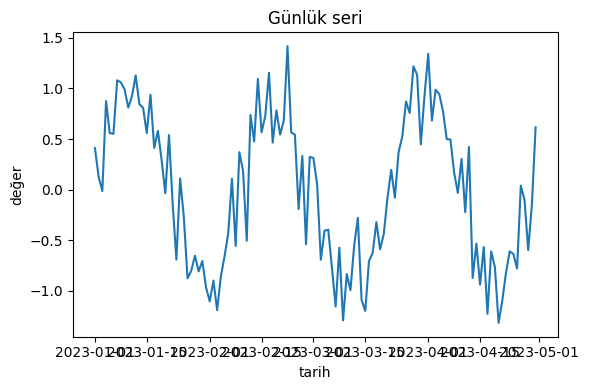

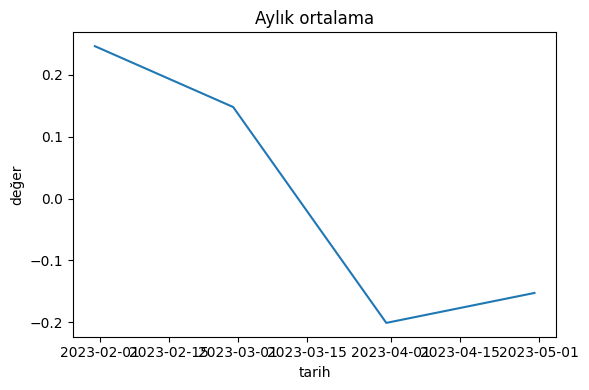

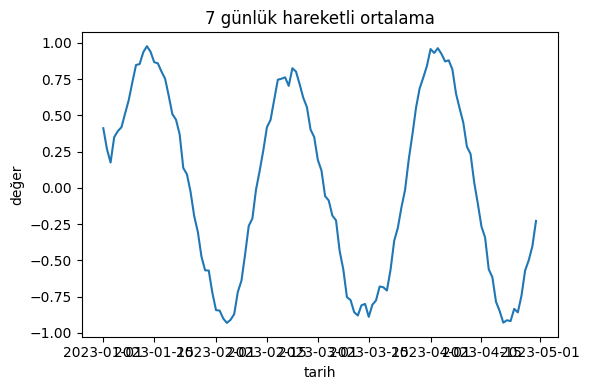

In [ ]:
rng = pd.date_range("2023-01-01", periods=120, freq="D")
ts = pd.DataFrame(
    {
        "tarih": rng,
        "deger": np.sin(np.linspace(0, 6 * np.pi, len(rng)))
        + np.random.normal(0, 0.3, len(rng)),
    }
).set_index("tarih")
monthly = ts.resample("M").mean()
roll = ts.rolling(window=7, min_periods=1).mean()

display(monthly.tail().style.hide(axis="index"))
display(roll.tail().style.hide(axis="index"))

plt.figure()
plt.plot(ts.index, ts["deger"])
plt.title("Günlük seri")
plt.xlabel("tarih")
plt.ylabel("değer")
plt.tight_layout()
plt.show()
plt.figure()
plt.plot(monthly.index, monthly["deger"])
plt.title("Aylık ortalama")
plt.xlabel("tarih")
plt.ylabel("değer")
plt.tight_layout()
plt.show()
plt.figure()
plt.plot(roll.index, roll["deger"])
plt.title("7 günlük hareketli ortalama")
plt.xlabel("tarih")
plt.ylabel("değer")
plt.tight_layout()
plt.show()

### **2.7. Belleği Aşmadan Dev Verilerle Çalışmak - Parçalı Okuma (Chunked I/O)**

Bir ML projesinde karşılaşacağınız en büyük engellerden biri veri setimizin bilgisayarınızın RAM'inden daha büyük olmasıdır. 50 GB'lık bir CSV dosyanız var ama sadece 16 GB RAM'e sahipsiniz. Bu durumda `pandas.read_csv('uber_duber_buyuk_dosya.csv')` komutunu çalıştırmak kaçınılmaz olarak bir `MemoryError` ile sonuçlanacaktır çünkü Pandas dosyanın tamamını tek seferde belleğe yüklemeye çalışır.

#### Peki RAM'e sığmayan bir veriyi nasıl işleyebiliriz?

**Cevap:** Dosyayı tek seferde yüklemek yerine, onu küçük ve yönetilebilir parçalara (chunk) ayırarak, her bir parçayı sırayla işleriz.

**Analoji:** Devasa bir ansiklopedinin tamamını tek seferde okuyup ezberlemeye çalışmak yerine, onu bölüm bölüm okuyup her bölümden önemli notlar çıkarmak gibidir. Sonunda tüm ansiklopediyi belleğinizde tutmasanız da, ihtiyacınız olan özet bilgiye sahip olursunuz.

#### **İşin Mantığı: Adım Adım Analiz**

1.  **`chunksize=2048` ile Reparo Efekti:** `pd.read_csv` fonksiyonuna `chunksize` parametresini verdiğinizde fonksiyonun davranışı tamamen değişir. Artık size devasa bir DataFrame döndürmek yerine, bir **iterator** (yineleyici) döndürür.

Bu iterator `for` döngüsü içinde her çağrıldığında dosyanın sonraki `2048` satırını okur ve size küçük, yönetilebilir bir DataFrame (`chunk`) olarak verir.

2.  **Döngü İçindeki İşlem:**
    *   Döngünün her adımında bellekte sadece `2048` satırlık bir DataFrame bulunur.
    *   Bu küçük DataFrame üzerinde istediğimiz filtrelemeyi (`chunk["grup"] >= 5`) ve toplama işlemini (`.sum()`) yaparız.
    *   Elde ettiğimiz sonucu (`total` gibi) döngünün dışında tanımladığımız bir değişkende biriktiririz.
    *   Döngünün bir sonraki adımına geçildiğinde, bir önceki `chunk` bellekten silinir ve yerine dosyanın bir sonraki `2048` satırı yüklenir.

Bu sayede, 12,000 satırlık (veya 12 milyon satırlık) dosyanın tamamı hiçbir zaman aynı anda bellekte olmaz. Sadece küçük parçalar halinde ziyaret edilir.

**Sürecin Görselleştirilmesi:**

```
[Dosya (12,000 satır)]
      |
      V
Döngü 1: chunk = [Satır 0 -> 2047]      -> total'a ekleme yap, cnt'yi artır
      |
      V
Döngü 2: chunk = [Satır 2048 -> 4095]   -> total'a ekleme yap, cnt'yi artır
      |
      V
Döngü 3: chunk = [Satır 4096 -> 6143]   -> total'a ekleme yap, cnt'yi artır
      |
      V
      ... (ve bu şekilde dosya bitene kadar devam eder)
      |
      V
[Nihai Sonuçlar: total ve cnt]
```

---

#### **Ne Zaman ve Neden Kullanmalıyız?**

Bu teknik aşağıdaki durumlarda kullanılabilir:

1.  **Belleğe Sığmayan Veri Setleri:** En bariz kullanım alanıdır. Veri setiniz RAM'inizden büyükse bu yöntem bir seçeneğiniz olabilir.
2.  **Toplu Hesaplamalar (Aggregations):** Tüm veri üzerinden tek bir sonuç (toplam, ortalama, sayım, maksimum değer vb.) hesaplamak istediğinizde mükemmeldir. Verinin tamamını bellekte tutmanıza gerek yoktur.
3.  **Büyük Veriyi Filtreleme:** 50 GB'lık bir log dosyasından sadece belirli bir tarih aralığına veya belirli bir hata koduna sahip satırları ayıklayıp daha küçük bir dosyaya kaydetmek için kullanabilirsiniz. Her parçayı okur ve koşulu sağlayan satırları yeni bir dosyaya eklersiniz.

**Sonuç:** `chunksize` kullanarak veriyi parçalar halinde işlemek, büyük veriyle başa çıkmak için temel bir stratejidir.

In [ ]:
buf = io.StringIO()
rows = 12000
print("id,grup,deg", file=buf)
for i in range(rows):
    print(f"{i},{i%10},{np.random.randn()}", file=buf)
buf.seek(0)

total = 0.0
cnt = 0
for chunk in pd.read_csv(buf, chunksize=2048):
    total += chunk.loc[chunk["grup"] >= 5, "deg"].sum()
    cnt += chunk.shape[0]
display(
    pd.DataFrame(
        [["satır_sayısı", cnt], ["grup>=5 toplam", round(total, 3)]],
        columns=["ölçü", "değer"],
    ).style.hide(axis="index")
)

ölçü,değer
satır_sayısı,12000.000000
grup>=5 toplam,-100.282000


---

## **3) Matplotlib ve Veri Görselleştirmenin Temelleri**

Bir analiz yaptınız, bir model eğittiniz veya veriyi temizlediniz. Peki, bulgularınızı nasıl sunacaksınız? Veya daha en başta, verinizin içinde ne gibi yapılar olduğunu nasıl keşfedeceksiniz? İşte bu noktada veri görselleştirme devreye girer. Matplotlib, Python'da veri görselleştirmenin temel taşıdır; esnekliği sayesinde neredeyse hayal edebileceğiniz her türlü grafiği oluşturmanıza olanak tanır.

Bu bölümde en sık kullanılan temel grafikleri **"tek figür prensibi"** ile inceleyeceğiz.

**Temel İş Akışı**
Tüm örneklerde tekrar eden basit bir iş akışı göreceksiniz:
1.  `plt.figure()`: Boş bir tuval veya çizim alanı oluştur.
2.  `plt.plot()`, `plt.scatter()`, vb.: Veriyi kullanarak tuvalin üzerine çizim yap.
3.  `plt.title()`, `plt.xlabel()`, `plt.ylabel()`: Grafiğe başlık ve eksen etiketleri ekleyerek onu anlaşılır kıl.
4.  `plt.tight_layout()`: Başlık ve etiketlerin grafiğe düzgünce sığmasını otomatik olarak ayarla.
5.  `plt.show()` veya `plt.savefig()`: Grafiği ekranda göster veya bir dosyaya kaydet.

---

#### **3.1. Temel Grafik Türleri ve Kullanım Alanları**

#### **3.1.1. Çizgi Grafiği (Line Plot)**


```python
x = np.linspace(0, 4*np.pi, 200)
y = np.sin(x)

plt.figure()
plt.plot(x, y)
plt.title("Sinüs Fonksiyonu")
plt.xlabel("x Değeri")
plt.ylabel("sin(x) Değeri")
plt.tight_layout()
plt.show()
```


*   **Ne Zaman Kullanılır?**
    *   **Trendleri ve Değişimleri Göstermek İçin:** Çizgi grafikleri verinin **sürekli bir aralık** boyunca nasıl değiştiğini göstermek için idealdir. En yaygın kullanım alanı, **zaman serisi** verileridir (örn: bir hisse senedinin aylar içindeki fiyatı, bir şehrin yıllık sıcaklık değişimi, bir hastanın kalp atış hızı).
*   **İşin Mantığı:**
    *   Bu grafik sıralı veri noktalarını düz çizgilerle birbirine bağlar. Bu bağlantı, noktalar arasında doğal bir sıralama ve devamlılık olduğu varsayımını yaratır. X ekseni genellikle zaman gibi sıralı ve sürekli bir değişkeni temsil eder.

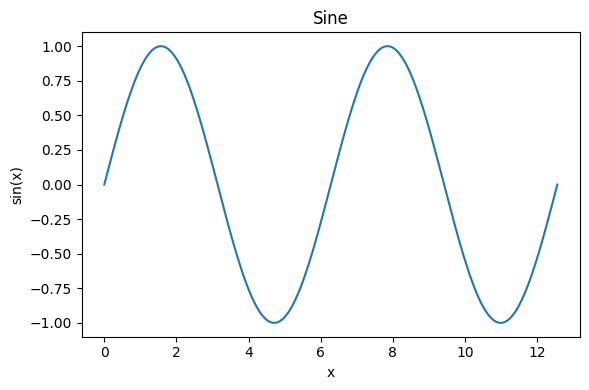

---

#### **3.1.2. Saçılım Grafiği (Scatter Plot)**

```python
rng = np.random.default_rng(42)
xs = rng.normal(0, 1, 200)
ys = 2*xs + rng.normal(0, 1, 200)

plt.figure()
plt.scatter(xs, ys)
plt.title("İki Değişken Arasındaki İlişki")
plt.xlabel("Bağımsız Değişken (x)")
plt.ylabel("Bağımlı Değişken (y)")
plt.tight_layout()
plt.show()
```

*   **Ne Zaman Kullanılır?**
    *   **İki Sayısal Değişken Arasındaki İlişkiyi İncelemek İçin:** "Bir değişken artarken diğeri de artıyor mu (pozitif korelasyon)?", "Biri artarken diğeri azalıyor mu (negatif korelasyon)?" veya "Aralarında bir ilişki yok mu?" gibi soruları cevaplamak için kullanılır. (Örn: öğrencilerin çalışma saati ile sınav notu, bir evin metrekaresi ile fiyatı).
*   **İşin Mantığı:**
    *   Çizgi grafiğinin aksine, noktaları birbirine bağlamaz. Her bir nokta, iki sayısal değişkenin (`x` ve `y`) birleşimini temsil eden bağımsız bir gözlemdir. Noktaların oluşturduğu desen, değişkenler arasındaki ilişkinin gücü ve yönü hakkında ipucu verir. Bu örnekte, noktaların soldan sağa doğru yukarı yönlü bir eğilim göstermesi, `x` ve `y` arasında pozitif bir ilişki olduğunu düşündürür.

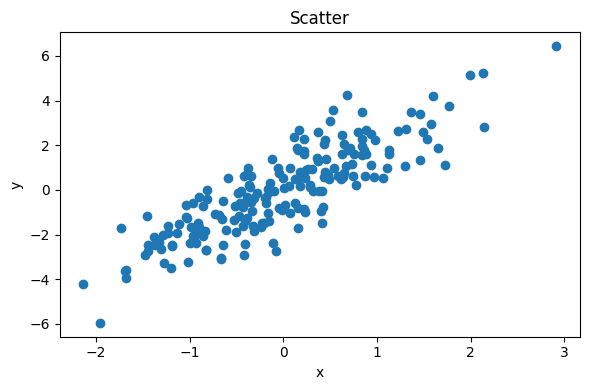

---

#### **3.1.3. Histogram**

```python
data = rng.normal(0, 1, 1000)

plt.figure()
plt.hist(data, bins=30) # bins: verinin kaç aralığa bölüneceği
plt.title("Veri Dağılımı Histogramı")
plt.xlabel("Değer Aralığı")
plt.ylabel("Frekans (Adet)")
plt.tight_layout()
plt.show()
```

*   **Ne Zaman Kullanılır?**
    *   **Tek Bir Sayısal Değişkenin Dağılımını Anlamak İçin:** "Veriler en çok hangi aralıkta toplanmış?", "Veri seti simetrik mi, yoksa bir yöne mi çarpık?", "Aykırı değerler var mı?" gibi soruları yanıtlar. (Örn: bir sınıftaki öğrencilerin boy uzunluklarının dağılımı, müşteri yaşlarının dağılımı).
*   **İşin Mantığı:**
    *   Histogram, veriyi belirli sayıda **aralığa (bins)** böler ve her bir aralığa kaç adet veri noktası düştüğünü sayar. Sonuç, bu sayımları gösteren bitişik sütunlardan (bar) oluşur. Sütunun yüksekliği, o aralıktaki veri yoğunluğunu (frekansını) temsil eder. **Bar grafiğinden en temel farkı, x ekseninin kategoriler değil, sayısal aralıklar olmasıdır.**

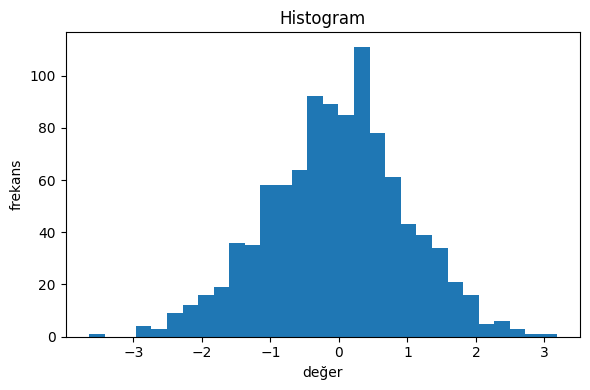

---

#### **3.1.4. Çubuk/Sütun Grafiği (Bar Chart)**

```python
vals = pd.Series(["A","B","A","C","B","A","C","C"]).value_counts()

plt.figure()
plt.bar(vals.index.astype(str), vals.values)
plt.title("Kategori Frekansları")
plt.xlabel("Kategori")
plt.ylabel("Frekans (Adet)")
plt.tight_layout()
plt.show()
```

*   **Ne Zaman Kullanılır?**
    *   **Kategorik Verilerin Karşılaştırılması İçin:** Farklı kategorilerin sayımlarını veya bir ölçümünü karşılaştırmak için kullanılır. (Örn: farklı araba markalarının satış adetleri, anket sorularına verilen 'Evet'/'Hayır'/'Kararsız' cevaplarının sayısı).
*   **İşin Mantığı:**
    *   Her bir kategori için ayrı bir sütun çizer. Sütunun yüksekliği, o kategorinin frekansını veya değerini temsil eder. Histogramdan farklı olarak, sütunlar arasında genellikle bir boşluk bulunur, bu da x eksenindeki etiketlerin sıralı veya sürekli olmadığını, bağımsız kategoriler olduğunu vurgular.

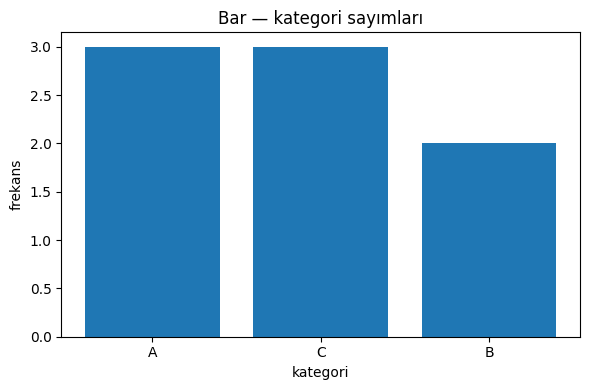

---

#### **3.1.5. Kutu Grafiği (Box Plot)**

```python
plt.figure()
plt.boxplot([rng.normal(0, 1, 200), rng.normal(1, 1.2, 200)],
            labels=["Grup 1", "Grup 2"])
plt.title("Grupların Değer Dağılımlarının Karşılaştırılması")
plt.xlabel("Grup")
plt.ylabel("Değer")
plt.tight_layout()
plt.show()
```

*   **Ne Zaman Kullanılır?**
    *   **Bir veya Daha Fazla Grubun Sayısal Dağılımını Özetlemek ve Karşılaştırmak İçin:** Tek bir grafikte bir veri setinin medyanını, çeyrekliklerini (verinin %25, %50 ve %75'lik dilimleri), yayılımını ve aykırı değerlerini gösterir. Özellikle farklı grupların dağılımlarını yan yana karşılaştırmak için çok güçlüdür. (Örn: A ve B okullarındaki öğrencilerin sınav notu dağılımlarını karşılaştırmak).
*   **İşin Mantığı:**
    *   **Kutunun içi:** Verinin orta %50'lik kısmını temsil eder.
    *   **Kutunun içindeki çizgi:** Medyanı (orta değer) gösterir.
    *   **Bıyıklar (whiskers):** Genellikle verinin büyük bir kısmını kapsayan aralığı gösterir.
    *   **Noktalar:** Bıyıkların ötesinde kalan ve potansiyel aykırı değerler (outliers) olarak kabul edilen tekil veri noktalarıdır.

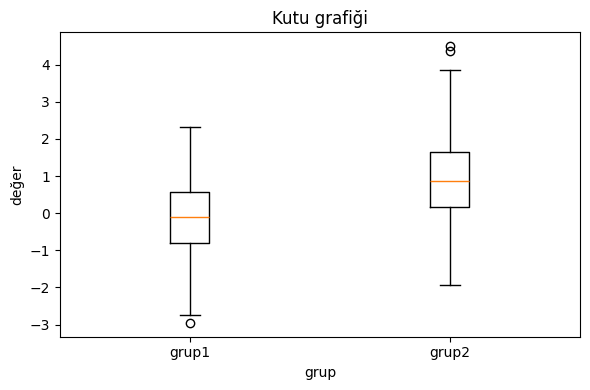

---

#### **3.2. Grafikleri Dosyaya Kaydetmek**

Grafikleri sadece ekranda göstermek yeterli değildir; raporlar, sunumlar veya web siteleri için onları kalıcı dosyalara (PNG, JPG, PDF, SVG) kaydetmemiz gerekir.

```python
from pathlib import Path

out = Path("fig_sine.png")

plt.figure()
x = np.linspace(0, 2*np.pi, 100)
plt.plot(x, np.sin(x))
plt.title("Kaydedilmiş Grafik")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.tight_layout()

# Grafiği ekranda göstermek yerine dosyaya kaydediyoruz
# dpi (dots per inch) parametresi çözünürlüğü belirler.
plt.savefig(out, dpi=150)

print("Grafik kaydedildi →", out.resolve())
```

*   **İşin Mantığı:**
    *   `plt.show()` komutu grafiği bir pencerede interaktif olarak gösterir ve çalışmayı orada duraklatır.
    *   `plt.savefig()` ise grafiği belirtilen yola, belirtilen format ve çözünürlükte, arka planda kaydeder. Bir script çalıştırırken genellikle `plt.show()` yerine `plt.savefig()` kullanılır. Eğer ikisini de kullanacaksanız, `savefig`'i `show`'dan önce çağırmak iyi bir pratiktir, çünkü `plt.show()` figürü temizleyebilir.